In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
# Load the dataset
data = pd.read_csv('data/rental prices.csv')  # Replace with your actual dataset path


In [18]:
# Display the first few rows of the dataset
print(data.head())

# Display the structure of the dataset
print(data.info())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  18/05/2022    2  10000  1100  Ground out of 2   Super Area   
1  13/05/2022    2  20000   800       1 out of 3   Super Area   
2  16/05/2022    2  17000  1000       1 out of 3   Super Area   
3  04/07/2022    2  10000   800       1 out of 2   Super Area   
4  09/05/2022    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [19]:
# Display summary statistics for categorical columns
print(data.describe(include=['O']))

         Posted On       Floor   Area Type Area Locality    City  \
count         4746        4746        4746          4746    4746   
unique          81         480           3          2235       6   
top     06/07/2022  1 out of 2  Super Area   Bandra West  Mumbai   
freq           311         379        2446            37     972   

       Furnishing Status  Tenant Preferred Point of Contact  
count               4746              4746             4746  
unique                 3                 3                3  
top       Semi-Furnished  Bachelors/Family    Contact Owner  
freq                2251              3444             3216  


In [20]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


In [21]:
# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


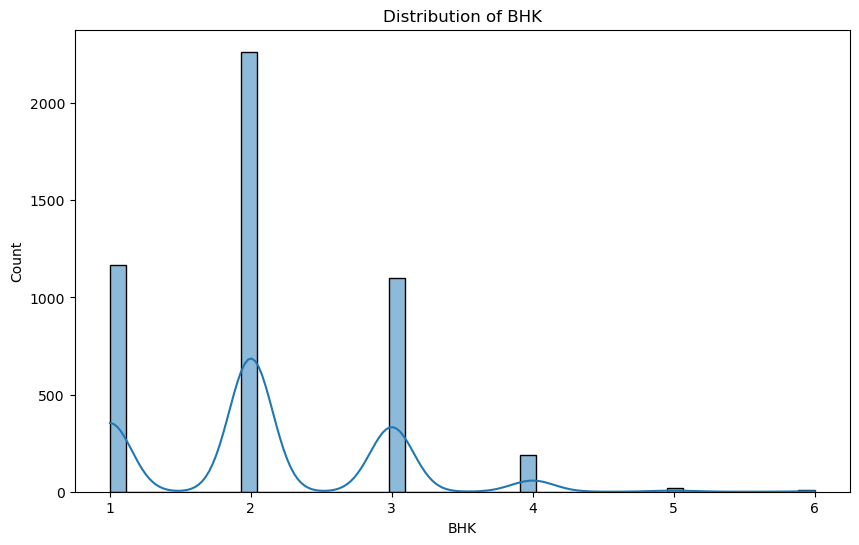

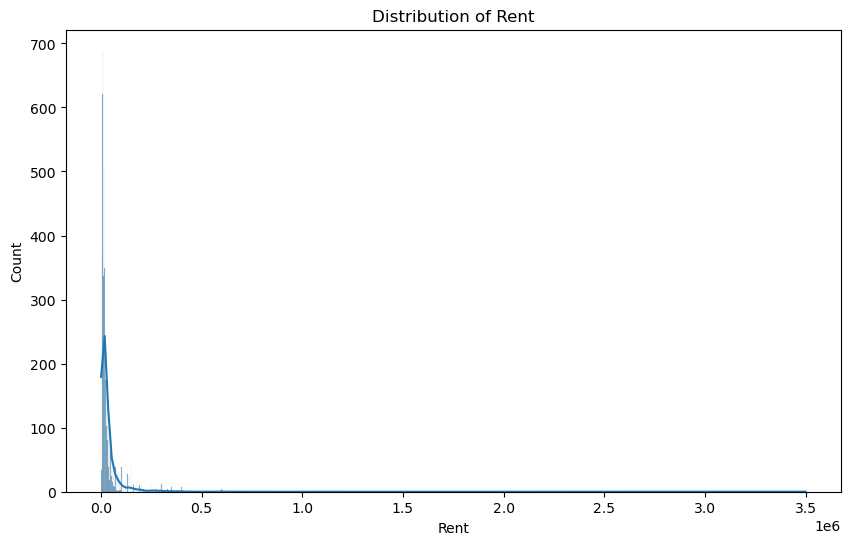

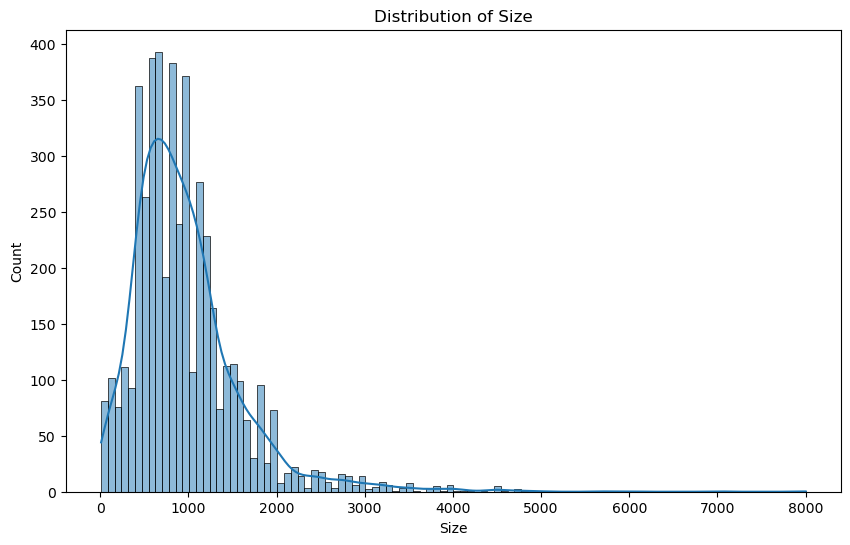

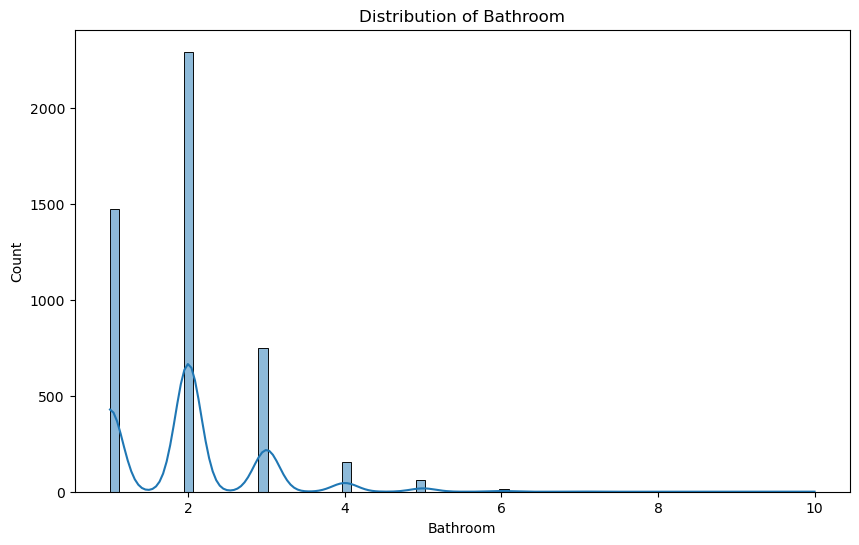

In [22]:
# Distribution of numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [23]:
# Drop unnecessary columns'
data = data.drop(columns=['Point of Contact', 'Posted On', 'Tenant Preferred',])

print(data.head())

   BHK   Rent  Size            Floor    Area Type             Area Locality  \
0    2  10000  1100  Ground out of 2   Super Area                    Bandel   
1    2  20000   800       1 out of 3   Super Area  Phool Bagan, Kankurgachi   
2    2  17000  1000       1 out of 3   Super Area   Salt Lake City Sector 2   
3    2  10000   800       1 out of 2   Super Area               Dumdum Park   
4    2   7500   850       1 out of 2  Carpet Area             South Dum Dum   

      City Furnishing Status  Bathroom  
0  Kolkata       Unfurnished         2  
1  Kolkata    Semi-Furnished         1  
2  Kolkata    Semi-Furnished         1  
3  Kolkata       Unfurnished         1  
4  Kolkata       Unfurnished         1  


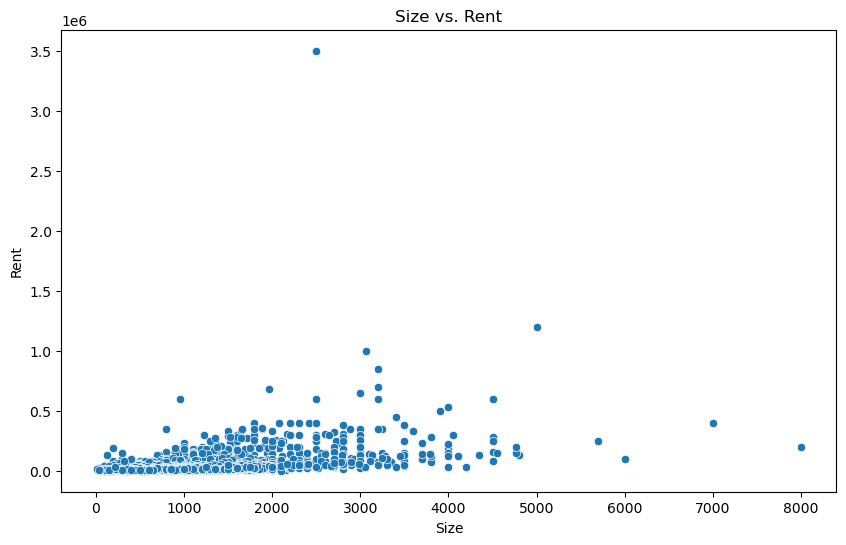

In [13]:
# Scatter plot between Size and Rent
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Rent', data=data)
plt.title('Size vs. Rent')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

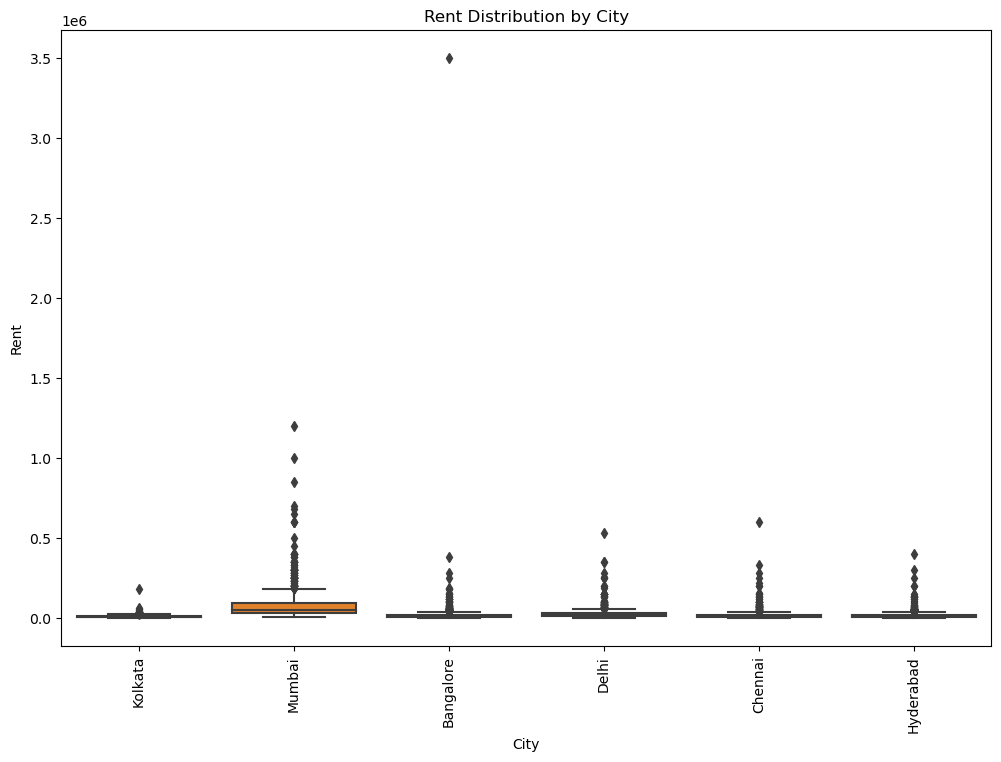

In [14]:
# Box plot for Rent by City
if 'City' in data.columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='City', y='Rent', data=data)
    plt.title('Rent Distribution by City')
    plt.xlabel('City')
    plt.ylabel('Rent')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'City' is not present in the dataset.")